In [10]:
# Python で動かして学ぶ!
# あたらしい 機械学習の
# 教科書
# 第3版
# 伊藤 真 著

# 第 6 章 教師あり学習：分類
# 6.1 1 次元入力 2 クラス分類

# 再開するにあたって、以下の 2 個のモジュールをインストールした
# > pip install matplotlib
# > pip install scipy

# リスト 6-1-(1)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データ生成 -----
np.random.seed(seed=0)            # 乱数を固定
X_min, X_max = 0, 2.5             # x の上限と下限（表示用）
N = 30                            # データ数
col = ["cornflowerblue", "gray"]  # クラス 0（メス） と 1（オス） の表示色
X = np.zeros(N)                   # 空の X を準備
T = np.zeros(N, dtype=np.uint8)   # 空の T を準備
prm_s = [0.4, 0.8]                # クラス 0 と 1 の分布の開始地点
prm_w = [0.8, 1.6]                # クラス 0 と 1 の分布の幅
                                  # ↑ メスの場合は 0.4 ～ 1.2、オスの場合 0.8 ～ 2.4 の質量とします
prm_pi = 0.5                      # クラス 0（メス）の全体に対する比率、0.5
for n in range(N):
    r = np.random.rand()
    T[n] = 0 * (r < prm_pi) + 1 * (r >= prm_pi)          # メス 0 になる確率 prm_pi = 0.5 として、メスとオスを確率的に決定
                                                         # True は 1、False は 0 としても解釈される
    X[n] = prm_s[T[n]] + np.random.rand() * prm_w[T[n]]
# データ表示
print("X =", np.round(X, 2))
print("T =", T)

X = [1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T = [1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


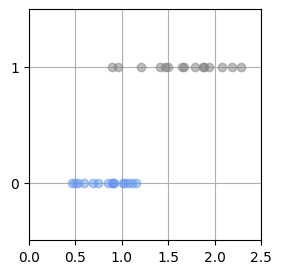

In [14]:
# リスト 6-1-(2)
# データ分布表示 -----
def show_dataid(x, t):
    for k in range(2):         # k = 0, 1 のループ
        plt.plot(              # 分布を表示
            x[t == k], t[t == k], col[k],
            alpha=0.5, linestyle="none", marker="o",
        )
    plt.xticks(np.arange(0, 3, 0.5))
    plt.yticks([0, 1])
    plt.xlim(X_min, X_max)
    plt.ylim(-0.5, 1.5)

# メイン -----
flg = plt.figure(figsize=(3, 3))
show_dataid(X, T)
plt.grid()
plt.show()

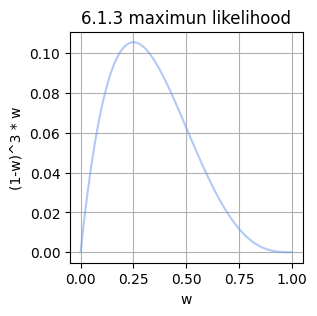

In [39]:
# p.226 の図6.5 のグラフを出力してみたかったので

def test_P(w):
    return (1 - w) * (1 - w) * (1 - w) * w

test_W = np.linspace(0.0, 1.0, 101)
test_Y = test_P(test_W)
plt.figure(figsize=(3, 3))
plt.plot(test_W, test_Y, "cornflowerblue", alpha=0.5, marker="none")
plt.title("6.1.3 maximun likelihood")
plt.xlabel("w")
plt.ylabel("(1-w)^3 * w")
plt.grid()
plt.show()

In [41]:
# リスト 6-1-(3)
# ロジスティック回帰モデル -----
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1]))) # 式 6-10
    return y

desiction boundaray = 1.25


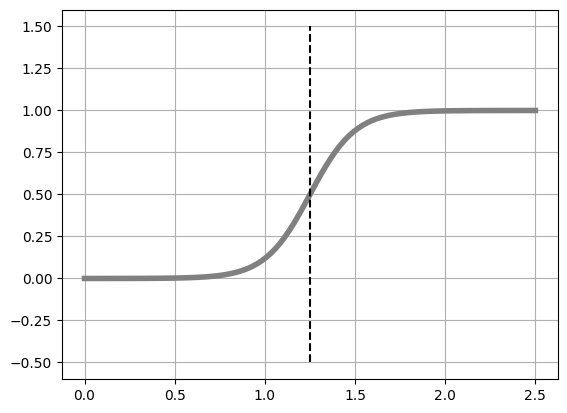

In [53]:
# p.229 リスト 6-1-(4)
# ロジスティック回帰モデルの表示 -----
def show_logistic(w):
    x = np.linspace(X_min, X_max, 100)
    y = logistic(x, w)
    plt.plot(x, y, "gray", linewidth=4)
    # 決定境界
    i = np.min(np.where(y > 0.5))             # y > 0.5 を満たす要素番号の最小値 i
    boundary = (x[i - 1] + x[i]) / 2          # y が 0.5 を超えた時の x[i] と、直前の　x[i - 1] の中点 の x の値を決定境界 boundary に代入 
    plt.plot([boundary, boundary], [-0.5, 1.5], "black", linestyle="--")
    return boundary                           # 決定境界は 1.25 で、その時の y の値は y = 8x - 10 に代入すると y = 0 になる。

# テスト -----
w = np.array([8, -10])  # y = 8x - 10 という式
b = show_logistic(w)
print(f'desiction boundaray = {b}')
plt.grid()
plt.show()